In [1]:
import pydicom, cv2
import numpy as np
import matplotlib.pyplot as plt

from pydicom.uid import ImplicitVRLittleEndian
from pydicom.dataset import Dataset, FileDataset
import cv2
import datetime

In [18]:
dcm=pydicom.read_file('./IHIS_Effusion_2_22889_60863_947369_3test.dcm')

In [31]:
image=np.load('./dicom_00000061_006_effusion_heat_map.npy')

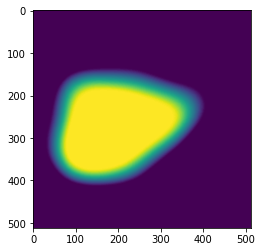

In [48]:
image=image[:,:,0]

In [49]:
image.shape

(512, 512)

In [19]:
image=dcm.pixel_array

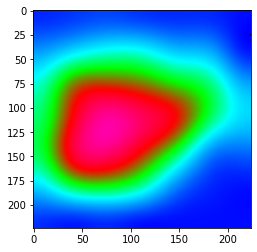

In [35]:
plt.imshow(image)

In [42]:
image=cv2.imread('./padchest_0008529.png')

In [95]:
image=np.zeros((512,512,3), dtype='uint8')
# image=image*255

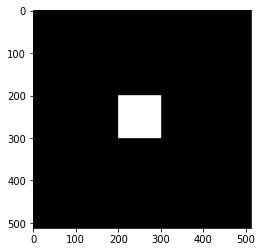

In [96]:
# image=cv2.rectangle(image,(0,0),(100,100),(0,255,255),-1)
# image=cv2.rectangle(image,(100,100),(200,200),(0,0,255),-1)
image=cv2.rectangle(image,(200,200),(300,300),(255,255,255),-1)
# image=cv2.rectangle(image,(300,300),(400,400),(255,0,255),-1)
# image=cv2.rectangle(image,(400,400),(500,500),(0,255,0),-1)

plt.imshow(image)

In [73]:
file_meta = Dataset()
file_meta.TransferSyntaxUID = ImplicitVRLittleEndian
file_meta.MediaStorageSOPClassUID = '1.1.2.'
file_meta.MediaStorageSOPInstanceUID = '1.2.3'
file_meta.ImplementationClassUID = '1.2.3.4'

# Create the dataset
ds = FileDataset("rohit.dcm", {}, file_meta=file_meta, preamble=b'\x00'*128)

# Add some of the data elements
ds.PatientName = "LM10"
ds.PatientID = "123456"

# Set the transfer syntax
ds.is_little_endian = True
ds.is_implicit_VR = True

arr = image

# (8-bit pixels, black and white)
ds.Rows, ds.Columns, dummy = arr.shape
ds.PhotometricInterpretation = "RGB"
ds.SamplesPerPixel = 3
ds.BitsStored = 8
ds.BitsAllocated = 8
ds.HighBit = 7
ds.PixelRepresentation = 0
ds.add_new(0x00280006, 'US', 0)


# Reassign back to the image data
ds.PixelData = arr.tobytes()
ds.fix_meta_info()

# Save DICOM
ds.save_as("rohit.dcm")

In [50]:
image=cv2.resize(image, (512,512))

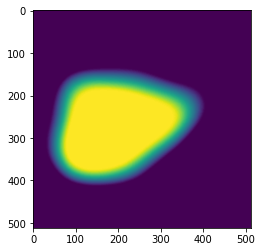

In [51]:
plt.imshow(image)

In [54]:
from pydicom.uid import ImplicitVRLittleEndian
from pydicom.dataset import Dataset, FileDataset
import cv2
import datetime

# Create the metadata for the dataset
file_meta = Dataset()
file_meta.TransferSyntaxUID = ImplicitVRLittleEndian
file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.2'
file_meta.MediaStorageSOPInstanceUID = '1.2.3'
file_meta.ImplementationClassUID = '1.2.3.4'

# Create the dataset
ds = FileDataset("Test4.dcm", {}, file_meta=file_meta, preamble=b'\x00'*128)

# Add some of the data elements
ds.PatientName = "Dicom^Anony"
ds.PatientID = "123456"

# Set the transfer syntax
ds.is_little_endian = True
ds.is_implicit_VR = True

# Set creation date/time
dt = datetime.datetime.now()
ds.ContentDate = dt.strftime('%Y%m%d')
timeStr = dt.strftime('%H%M%S.%f')  # long format with micro seconds
ds.ContentTime = timeStr

# Read in the JPG file
# img = cv2.imread("padchest_0008529.png");

# Get the numpy array
arr = image

# (8-bit pixels, black and white)
ds.Rows, ds.Columns = arr.shape
ds.PhotometricInterpretation = "Monochrome"
ds.SamplesPerPixel = 1
ds.BitsStored = 8
ds.BitsAllocated = 8
ds.HighBit = 7
ds.PixelRepresentation = 0
ds.add_new(0x00280006, 'US', 0)


# Reassign back to the image data
ds.PixelData = arr.tobytes()

# Save DICOM
ds.save_as("Test_ct_only_heatmap_1channel.dcm")

In [55]:
dcm=pydicom.read_file("Test_ct_only_heatmap_1channel.dcm")

In [56]:
dcm

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.3
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
-------------------------------------------------
(0008, 0023) Content Date                        DA: '20210511'
(0008, 0033) Content Time                        TM: '102356.798086'
(0010, 0010) Patient's Name                      PN: 'Dicom^Anony'
(0010, 0020) Patient ID                          LO: '123456'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'Monochrome'
(0028, 0006) Planar Configuration                US: 0
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0100) Bits Allocated                      US: 8
(0028, 0101) Bits Stored

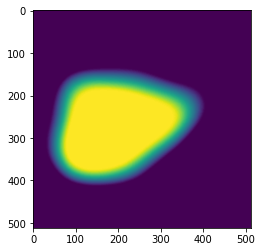

In [57]:
import matplotlib.pyplot as plt
plt.imshow(dcm.pixel_array)

In [60]:
np.min(image)

0

In [58]:
import os
os.system('gdcmconv --jpegls {0} {1}'.format('Test_ct_only_heatmap_1channel.dcm', 'compressed_Test_ct_only_heatmap_1channel.dcm'))

0

In [79]:
! gdcmconv

gdcmconv: gdcm 2.8.4 $Date$
Usage: gdcmconv [OPTION] input.dcm output.dcm
Convert a DICOM file into another DICOM file.
Parameter (required):
  -i --input      DICOM filename
  -o --output     DICOM filename
Options:
  -X --explicit            Change Transfer Syntax to explicit.
  -M --implicit            Change Transfer Syntax to implicit.
  -U --use-dict            Use dict for VR (only public by default).
     --with-private-dict   Use private dict for VR (advanced user only).
  -C --check-meta          Check File Meta Information (advanced user only).
     --root-uid            Root UID.
     --remove-gl           Remove group length (deprecated in DICOM 2008).
     --remove-private-tags Remove private tags.
     --remove-retired      Remove retired tags.
Image only Options:
  -l --apply-lut                      Apply LUT (non-standard, advanced user only).
     --decompress-lut                 Decompress LUT (linearied segmented LUT).
  -P --photometric-interpretation %s  Change P

In [48]:
! gdcmconv --jpegls ./Test_new.dcm compressed_Test_lflds.dcm

Could not read (pixmap): ./Test_new.dcm


In [94]:
os.system('gdcmconv --lossy -q 95,95,95 --j2k {0} {1}'.format('./Test4.dcm', 'rohit_compressed_new.dcm'))

256

In [28]:
os.system('gdcmconv --raw --verbose {0} {1}'.format('./compressed_dicom/compressed_Test.dcm','./decompressed_Test.dcm'))

256

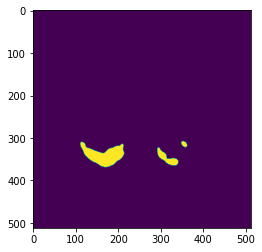

In [65]:
dcm=pydicom.read_file('/opt/bucketdata/Users/Rohit/3D_CT_Model/test_heatmaps/only_heatmaps/positive/uncompressed/500.dcm')
plt.imshow(dcm.pixel_array)



# Create the metadata for the dataset
file_meta = Dataset()
file_meta.TransferSyntaxUID = ImplicitVRLittleEndian
file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.2'
file_meta.MediaStorageSOPInstanceUID = '1.2.3'
file_meta.ImplementationClassUID = '1.2.3.4'

# Create the dataset
ds = FileDataset("Test4.dcm", {}, file_meta=file_meta, preamble=b'\x00'*128)

# Add some of the data elements
ds.PatientName = "Dicom^Anony"
ds.PatientID = "123456"

# Set the transfer syntax
ds.is_little_endian = True
ds.is_implicit_VR = True

# Set creation date/time
# dt = datetime.datetime.now()
# ds.ContentDate = dt.strftime('%Y%m%d')
# timeStr = dt.strftime('%H%M%S.%f')  # long format with micro seconds
# ds.ContentTime = timeStr

# Read in the JPG file
# img = cv2.imread("TestImage.jpg");

# Get the numpy array
arr = image

# (8-bit pixels, black and white)
ds.Rows, ds.Columns, dummy = arr.shape
ds.PhotometricInterpretation = "RGB"
ds.SamplesPerPixel = 3
ds.BitsStored = 8
ds.BitsAllocated = 8
ds.HighBit = 7
ds.PixelRepresentation = 0
ds.add_new(0x00280006, 'US', 0)


# Reassign back to the image data
ds.PixelData = arr.tobytes()
ds.fix_meta_info()

# Save DICOM
ds.save_as("Test4.dcm")